In [15]:
import os 
import numpy as np
import pandas as pd
from numpy import ndarray
from nsddatapaper_rsa.utils.nsd_get_data import get_conditions, get_labels
from nsddatapaper_rsa.utils.utils import category_dict, mds
from utils.utils import *
from utils.kabsch2D import *
from nsd_access import NSDAccess 
from matplotlib import cm 
import scprep
import matplotlib.pyplot as plt

In [16]:
nsda = NSDAccess(nsd_dir)

In [17]:
rois

{'V1': 1,
 'V2': 2,
 'V3': 3,
 'hV4': 4,
 'VO-1': 5,
 'VO-2': 6,
 'PHC-1': 7,
 'PHC-2': 8,
 'LO-1': 9,
 'LO-2': 10,
 'TO-1': 11,
 'TO-2': 12}

In [18]:
labels = np.load('/home/stan/thesis-repo/projects/NSD/rsa/all_stims_category_labels.npy', allow_pickle=True)
mds_v1 = np.load('/home/stan/thesis-repo/data/MDS/betas_split/subj01_37_V1_mds_betas_train.npy', allow_pickle=False)
mds_v2 = np.load('/home/stan/thesis-repo/data/MDS/betas_split/subj01_37_V2_mds_betas_train.npy', allow_pickle=False)
mds_phc_1 = np.load('/home/stan/thesis-repo/data/MDS/betas_split/subj01_37_PHC-1_mds_betas_train.npy', allow_pickle=False)

In [19]:
cols = ['source', 'target', 'U', 'error']
rotations = np.zeros((len(rois) * (len(rois)-1), len(cols)), dtype=object)
i = 0 
for roi_source in rois.keys():
    mds_source = np.load(f'/home/stan/thesis-repo/data/MDS/betas_split/subj01_37_{roi_source}_mds_betas_train.npy', allow_pickle=False)
    for roi_target in rois.keys():
        if roi_source != roi_target:
            mds_target = np.load(f'/home/stan/thesis-repo/data/MDS/betas_split/subj01_37_{roi_target}_mds_betas_train.npy', allow_pickle=False)
            U, t= kabsch2D(mds_source, mds_target, translate=True )
            rotations[i, 0] = roi_source
            rotations[i, 1] = roi_target
            rotations[i, 2] = U
            rotated_source = rotate(mds_source, U)
            rotations[i, 3] = error(rotated_source, mds_target, t)
            i += 1    

In [20]:
rotations_df = pd.DataFrame(rotations, columns=cols)
rotations_df

,source,target,U,error
0,V1,V2,"[[0.9937364, 0.111750215], [-0.111750215, 0.99...",5843.815918
1,V1,V3,"[[0.25467932, 0.9670255], [-0.9670255, 0.25467...",6156.311523
2,V1,hV4,"[[-0.8642162, -0.50312066], [0.50312066, -0.86...",6783.592773
3,V1,VO-1,"[[0.99987525, 0.015795678], [-0.015795678, 0.9...",7456.831543
4,V1,VO-2,"[[-0.66655576, -0.74545515], [0.74545515, -0.6...",7431.786621
...,...,...,...,...
127,TO-2,PHC-1,"[[-0.98772126, -0.15622663], [0.15622663, -0.9...",5454.418945
128,TO-2,PHC-2,"[[-0.9926892, 0.1206992], [-0.1206992, -0.9926...",4427.479004
129,TO-2,LO-1,"[[-0.6796371, -0.73354846], [0.73354846, -0.67...",7566.588867
130,TO-2,LO-2,"[[-0.026073754, -0.99966], [0.99966, -0.026073...",6625.286621


In [21]:
mds_v1 @ rotations_df.iloc[0, 2]

array([[-0.72440636, -0.38701114],
       [ 0.26023063, -0.71973735],
       [ 0.25628436, -0.1409153 ],
       ...,
       [ 0.08985452,  0.67104214],
       [ 0.19556299,  0.5759758 ],
       [-0.7017812 ,  0.35206485]], dtype=float32)

In [22]:
mds_v2

array([[-0.66225195, -0.48874635],
       [-0.54524916, -0.04628509],
       [-0.5010109 , -0.47472292],
       ...,
       [ 0.45654756, -0.4582592 ],
       [ 0.57899445,  0.31039384],
       [ 0.30699056,  0.13743499]], dtype=float32)

In [23]:
# 0.401426 is 23 degrees in radians 
v1_23 = np.dot(mds_v1, np.array([[np.cos(0.401426), np.sin(0.401426)], [-np.sin(0.401426),np.cos(0.401426)]]))
v1_23

array([[-0.58381372, -0.57767087],
       [ 0.45483143, -0.61552431],
       [ 0.28584343, -0.06190568],
       ...,
       [-0.10541021,  0.66877501],
       [ 0.02303473,  0.60783412],
       [-0.77307483,  0.13711957]])

In [25]:
U = kabsch2D(mds_v1, v1_23)
err = error(rotate(mds_v1, U), v1_23)
err

4.0056759651899806e-17

In [26]:
np.cos(0.401)

0.9206711151950209

In [27]:
U

array([[ 0.92050475,  0.39073138],
       [-0.39073138,  0.92050475]])

/tmp/ipykernel_9846/3478442088.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(arr_23.T[0], arr_23.T[1], cmap='red')
/tmp/ipykernel_9846/3478442088.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(arr_23_pos.T[0], arr_23_pos.T[1], cmap='green')


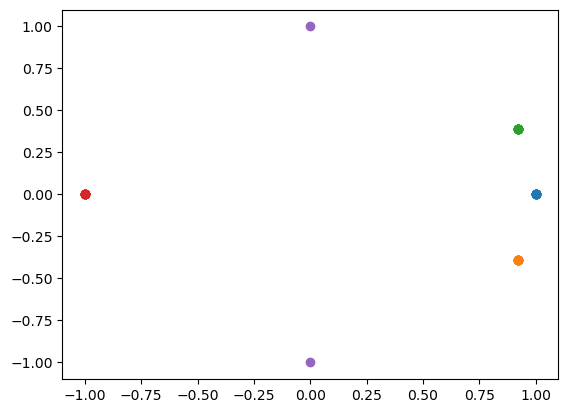

In [14]:
arr = np.array([[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0]])
arr_23 = np.dot(arr, np.array([[np.cos(0.401426), -np.sin(0.401426)], [-np.cos(0.401426), np.sin(0.401426)]]))
arr_23_pos = np.dot(arr, np.array([[np.cos(0.401426), np.sin(0.401426)], [np.cos(0.401426), np.sin(0.401426)]]))
arr_neg = np.array([[-1,0],[-1,0],[-1,0],[-1,0],[-1,0],[-1,0],[-1,0],[-1,0]])
u = np.array([[0, 1], [0, -1]])
plt.scatter(arr.T[0], arr.T[1])
plt.scatter(arr_23.T[0], arr_23.T[1], cmap='red')
plt.scatter(arr_23_pos.T[0], arr_23_pos.T[1], cmap='green')
plt.scatter(arr_neg.T[0], arr_neg.T[1])
plt.scatter(u.T[0], u.T[1])

In [15]:
n_sessions = 37
n_subjects = 8
subject = 0
roi = "v1" 

flat_labels = [item for sublist in labels for item in sublist]
all_labels = sorted(list(set(flat_labels)))

category_colors = cm.RdYlBu(range(80))

sub = 'subj01'

conditions = get_conditions(nsd_dir, sub, n_sessions)
conditions = np.asarray(conditions).ravel()



		sub: subj01 fetching condition trials in session: 1
		sub: subj01 fetching condition trials in session: 2
		sub: subj01 fetching condition trials in session: 3
		sub: subj01 fetching condition trials in session: 4
		sub: subj01 fetching condition trials in session: 5
		sub: subj01 fetching condition trials in session: 6
		sub: subj01 fetching condition trials in session: 7
		sub: subj01 fetching condition trials in session: 8
		sub: subj01 fetching condition trials in session: 9
		sub: subj01 fetching condition trials in session: 10
		sub: subj01 fetching condition trials in session: 11
		sub: subj01 fetching condition trials in session: 12
		sub: subj01 fetching condition trials in session: 13
		sub: subj01 fetching condition trials in session: 14
		sub: subj01 fetching condition trials in session: 15
		sub: subj01 fetching condition trials in session: 16
		sub: subj01 fetching condition trials in session: 17
		sub: subj01 fetching condition trials in session: 18
		sub: subj01 fetch

In [16]:
#conditions_bool = [
 #   True if np.sum(conditions == x) == 3 else False for x in conditions]

sample, sample_idx = np.unique(conditions, return_index=True)
categories_sampled = labels[sample_idx]

In [17]:
category_matrix = get_labels(sub, betas_dir, nsd_dir, sample, labels, categories_sampled)

loading serialised label matrix from:
	 /home/stan/thesis-repo/projects/NSD/rsa/subj01_sample_labels.npy


In [18]:
category_matrix.shape

(9841, 80)

In [19]:
category_classes = []
for cat_i in range(80):
    flat = np.full(len(sample), '0_unknown')
    flat[category_matrix[:, cat_i] == 1] = all_labels[cat_i]
    category_classes.append(flat)

In [20]:
class_labels = []
for categ_v in category_matrix:

    # 1 is animate, 0 inanimate
    cat_is = np.where(categ_v)[0]
    anim_class = [category_dict[str(x)] for x in cat_is]

    n_anim = np.sum(anim_class)

    # special case only people
    if len(cat_is) == 1 and cat_is == 49:
        class_label = 'a_people'

    # people with other animates
    elif 49 in cat_is and n_anim == len(anim_class):
        class_label = 'a_people_animates'

    # people with inanimates
    elif 49 in cat_is and n_anim == 1:
        class_label = 'a_people_inanimates'

    # people with both animates and inanimates 
    elif 49 in cat_is and n_anim < len(anim_class):
        class_label = 'a_people_animates_inanimates'

    # all ones? only animate
    elif n_anim == len(anim_class):
        class_label = 'animates'

    elif np.sum(anim_class) == 0:  # only inanimate
        class_label = 'inanimates'

    # mixed non-people and inanimates
    else:
        class_label = 'animates_inanimates'

    class_labels.append(class_label)


/home/stan/miniconda3/envs/thesis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='MDS1', ylabel='MDS2'>

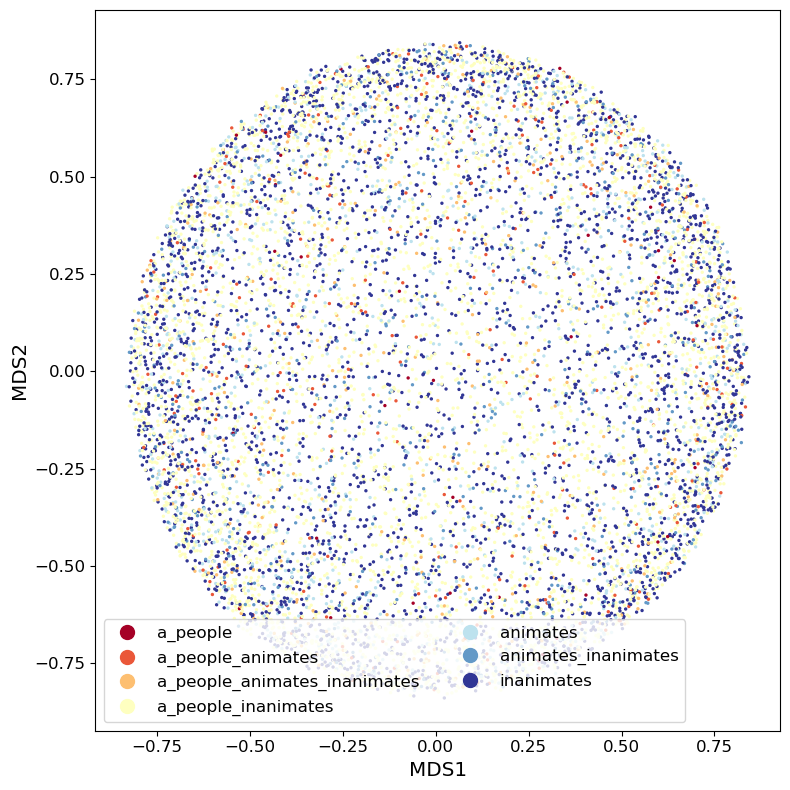

In [21]:
scprep.plot.scatter2d(
        mds_v1,
        c=class_labels,
        figsize=(8, 8),
        cmap="RdYlBu",
        ticks=True,
        legend_loc='lower left',
        legend_ncol=2,
        label_prefix="MDS"
    )

/home/stan/miniconda3/envs/thesis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='MDS1', ylabel='MDS2'>

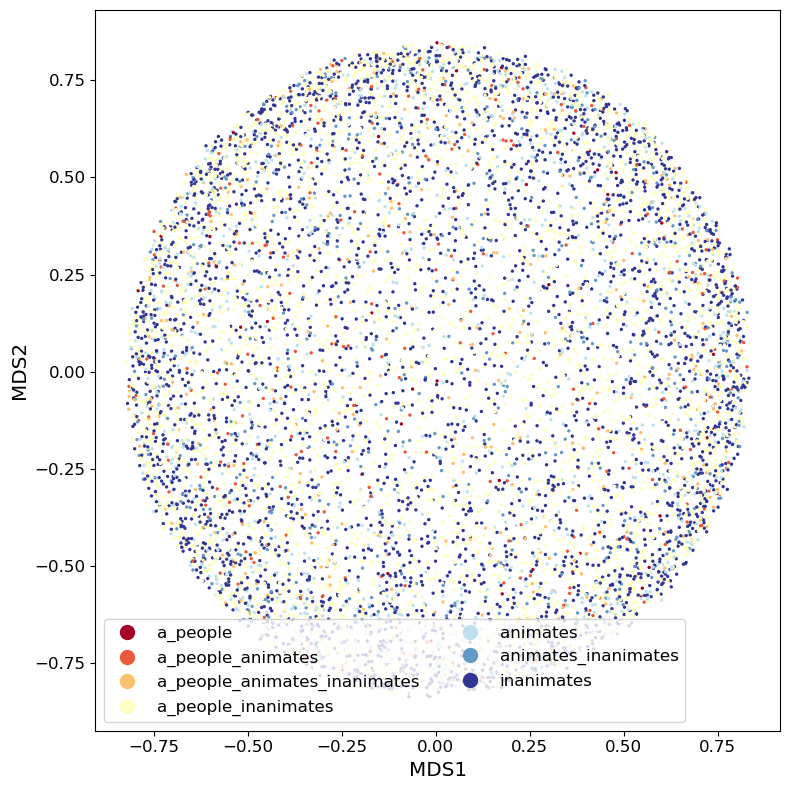

In [40]:
scprep.plot.scatter2d(
        v1_23,
        c=class_labels,
        figsize=(8, 8),
        cmap="RdYlBu",
        ticks=True,
        legend_loc='lower left',
        legend_ncol=2,
        label_prefix="MDS"
    )

/home/stan/miniconda3/envs/thesis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='MDS1', ylabel='MDS2'>

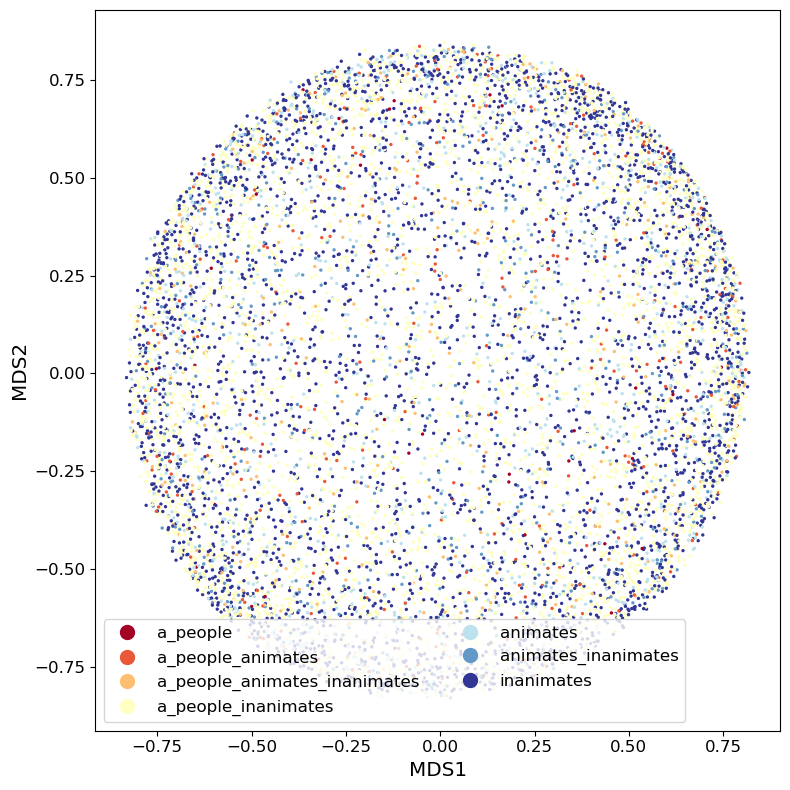

In [16]:
scprep.plot.scatter2d(
        mds_v2,
        c=class_labels,
        figsize=(8, 8),
        cmap="RdYlBu",
        ticks=True,
        legend_loc='lower left',
        legend_ncol=2,
        label_prefix="MDS"
    )

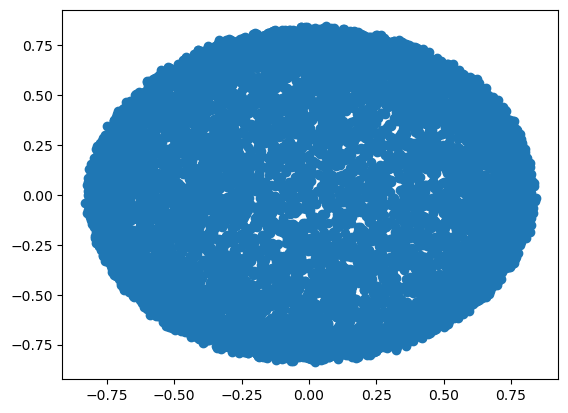

In [17]:
plt.scatter(mds_v1.T[0], mds_v1.T[1])

In [18]:
rotate_v1 = rotate(mds_v1, kabsch2D(mds_v1, mds_v2))

/home/stan/miniconda3/envs/thesis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='MDS1', ylabel='MDS2'>

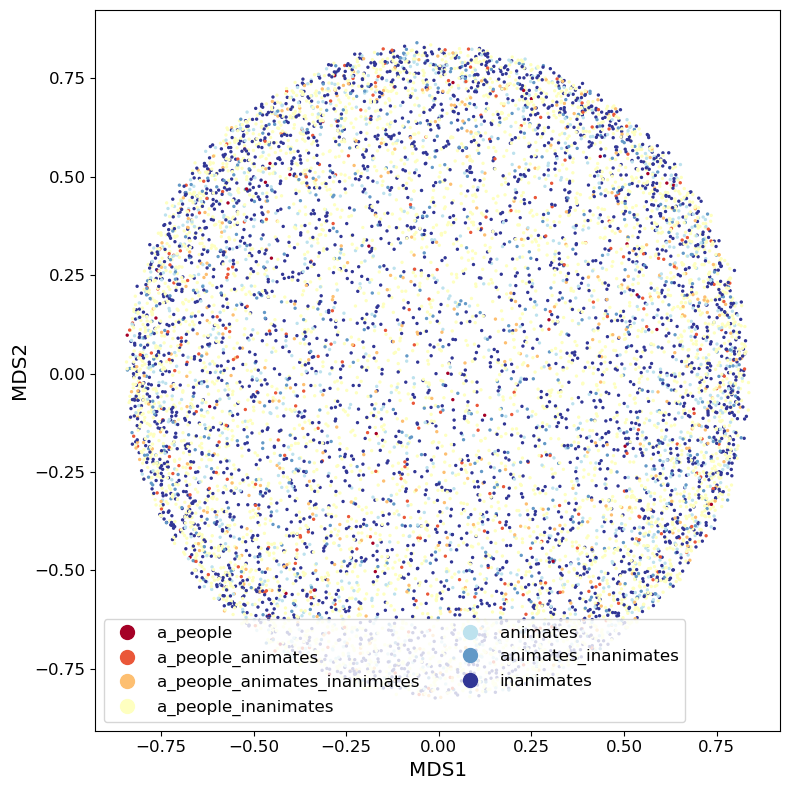

In [19]:
scprep.plot.scatter2d(
        rotate_v1,
        c=class_labels,
        figsize=(8, 8),
        cmap="RdYlBu",
        ticks=True,
        legend_loc='lower left',
        legend_ncol=2,
        label_prefix="MDS"
    )

/home/stan/miniconda3/envs/thesis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='MDS1', ylabel='MDS2'>

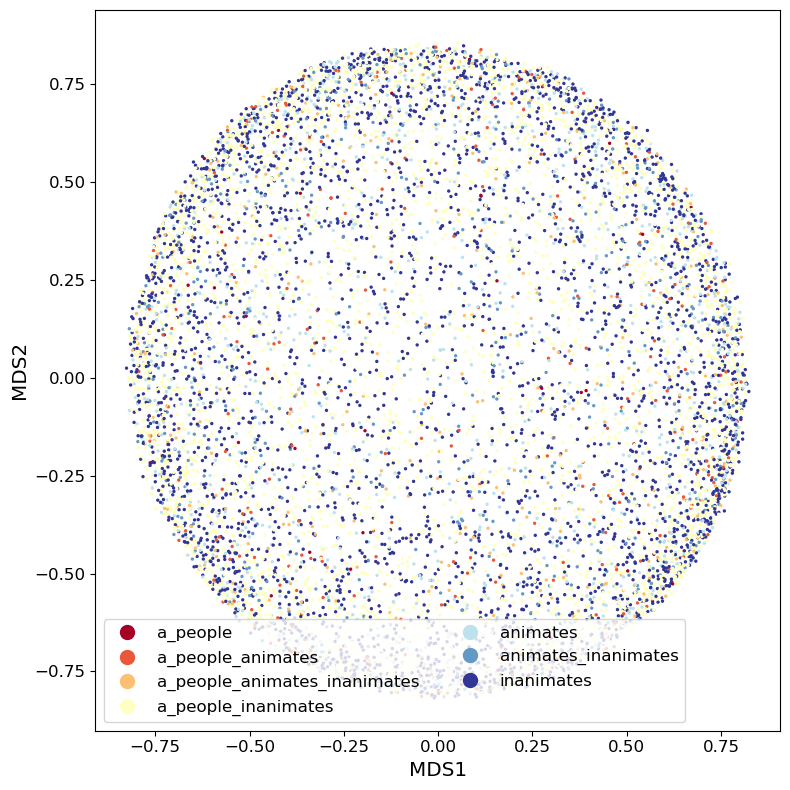

In [23]:
scprep.plot.scatter2d(
        mds_phc_1,
        c=class_labels,
        figsize=(8, 8),
        cmap="RdYlBu",
        ticks=True,
        legend_loc='lower left',
        legend_ncol=2,
        label_prefix="MDS"
    )